# ECON202A Problem Set

Team members: David Johannes, Bailey Johnson, Chandni Raja, Natasha Watkins

### Problem 1

Given $u(c_t) = -\frac{1}{2} (\bar{c} - c_t)^2$ and $r = \delta$,

\begin{align*}
    u'(c_t) &= \bar{c} - c_t
\end{align*}

By the Theorem (Hall, pg. 974)

\begin{align*}
    E_t u'(c_{t+1}) &= \frac{1+\delta}{1+r} u'(c_t) \\
    \Rightarrow \bar{c} - E_t c_{t+1} &= \bar{c} - c_t \\
    c_t &= E_t c_{t+1} \\
    \Rightarrow c_{t+1} &= c_t - \varepsilon_{t+1}
\end{align*}

Where $\varepsilon_{t+1}$ is the true disturbance term, so that $E_t \varepsilon_{t+1} = 0$, and therefore is white noise. This is a random walk process with no constant. 

### Problem 2

The permanent-income hypothesis suggests that consumers' behaviour incorporates expectations of their future ability to consume, i.e., their consumption today should reflect their expectation of future income in all periods.  Forecasting future consumption should therefore only be a function of current consumption, as current consumption incorporates expectations of all other variables that might affect consumption, and so the stochastic process for income is irrelevant for forecasting.

As consumption in the next period is only a function of current consumption, the error term has no effect on the level of consumption, i.e., $E_t \varepsilon_{t+1} = 0$. Because $c_{t+1}$ is not explained by consumption in any other period, the error terms should be uncorrelated, i.e., $E_t(\varepsilon_{t+1} \varepsilon_{t+\tau}) = 0$ for all $\tau \neq 1$. Therefore, the error term is a white noise process.

### Problem 3

### Problem 4

In [1]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.api import tsa, OLS

In [2]:
fred = Fred(api_key='16fc433e0cb217bb8cb94bf76b981f2f')
c = fred.get_series('A794RX0Q048SBEA')  # Real personal consumption expenditures per capita

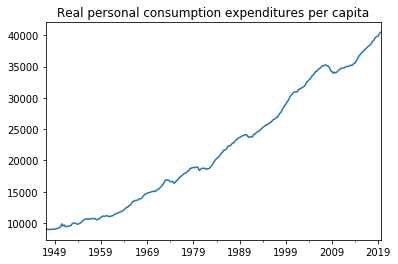

In [3]:
c.plot(title='Real personal consumption expenditures per capita')
plt.show()

In [9]:
data = pd.DataFrame()
data['y'] = np.log(c).values
data['X'] = np.log(c).shift(1).values # Shift to obtain consumption last period
data['constant'] = 1
data = data[1:]  # Drop first observation

In [6]:
model = OLS(data.y, data[['constant', 'X']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.886e+05
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:06:24   Log-Likelihood:                 990.19
No. Observations:                 290   AIC:                            -1976.
Df Residuals:                     288   BIC:                            -1969.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.0148      0.010      1.486      0.1

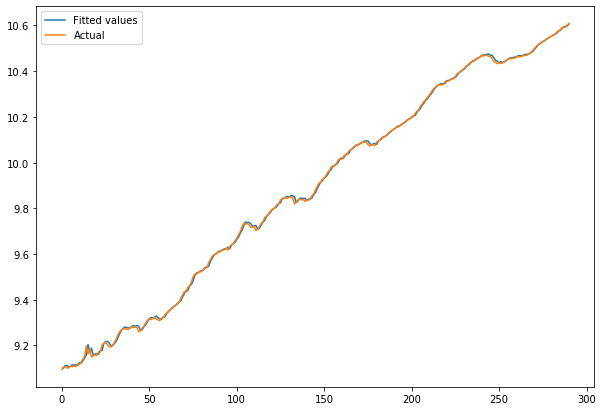

In [7]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(results.fittedvalues, label='Fitted values')
ax.plot(log_c, label='Actual')
plt.legend()
plt.show()

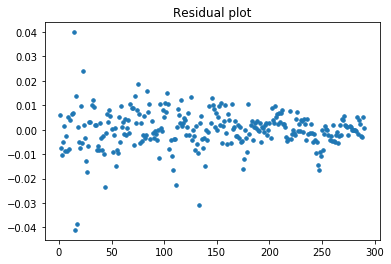

In [8]:
plt.plot(results.resid.index, results.resid, '.', ms=7)
plt.title('Residual plot')
plt.show()

The AR(1) process appears to be a reasonable statistical model of log consumption. The autoregressive coefficient is 0.999, indicating that log consumption is highly autoregressive. The residual plot shows that something similiar to a white noise process. The $R^2$ value indicates current consumption is explained almost perfect by previous period's consumption.

### Problem 4